## Part 0. Setup Steps

- Create a repo on GitHub named `eds217-trypy-02`
- Clone to create a version-controlled project
- Create some subfolder infrastructure (nbs, data, etc..)
- Create a new python notebook.

## Part 1. Real data

Explore this [data package](https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-arc.10341.5) from EDI, which contains a "Data file describing the biogeochemistry of samples collected at various sites near Toolik Lake, North Slope of Alaska". Familiarize yourself with the metadata (particularly, View full metadata > expand 'Data entities' to learn more about the variables in the dataset). 

**Citation:** Kling, G. 2016. Biogeochemistry data set for soil waters, streams, and lakes near Toolik on the North Slope of Alaska, 2011. ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/362c8eeac5cad9a45288cf1b0d617ba7 

1. Download the CSV containing the Toolik biogeochemistry data
2. Take a look at it - how are missing values stored? Keep that in mind. 
3. Drop the CSV into your data folder of your project
4. Create a new notebook document in VSCode (or in a `jupyter notebook` server), save in docs as `toolik_chem.ipynb`
5. Import the `pandas`, `numpy`, and `matplotlib.pyplot` libraries into your first code cell.
6. Read in the data as `toolik_biochem`. Remember, you'll want to specify here how `NA` values are stored (hint: use the `na_values` argument in your `pd.read_csv` call.) Additionally, convert all column names to lower case/underscore format (replace spaces with underscores and put everything in lower case). 

In [27]:
#| echo: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

toolik_biochem = pd.read_csv(
    '../../data/2011_Kling_Akchem.csv',
    na_values=".")

# strategy a:
toolik_biochem.columns = toolik_biochem.columns.str.lower().str.replace(' ', '_')

# strategy b:
toolik_biochem.columns = [col.lower().replace(' ', '_') for col in toolik_biochem.columns]

FileNotFoundError: [Errno 2] No such file or directory: '../data/2011_Kling_Akchem.csv'

7. Create a subset of the data that contains only observations from the "Toolik Inlet" site, and that only contains the variables (columns) for pH, dissolved organic carbon (DOC), and total dissolved nitrogen (TDN). Store this subset as `inlet_biochem`. Make sure to LOOK AT the subset you've created. 

In [22]:
#| echo: false
valid = toolik_biochem["site"] == "Toolik Inlet"
inlet_biochem = toolik_biochem[valid][[
    'ph','doc_um','tdn_um']]

8. Find the mean value of each column in `inlet_biochem` 2 different ways: 

a. Write a for loop from scratch to calculate the mean for each
b. Use *one other method* (e.g. `.mean()`, or `.apply()`) to find the mean for each column.

In [24]:
#| echo: false
import numpy as np

# Strategy a:
print("Using for loop:")
for col in inlet_biochem.columns:
    mean_val = np.nanmean(inlet_biochem[col])
    print(f"col {col}: {mean_val:.2f}")

# Strategy b: 
print("Using list comprehension:")
[print(
    f"col {col}:",
    f"{np.nanmean(inlet_biochem[col]):.2f}")
 for col in inlet_biochem.columns]

# Strategy c: 
print("Using df.mean()")
print(inlet_biochem.mean())

# Strategy d: 
print("Using .apply()")
print(inlet_biochem.apply(np.nanmean))

Using for loop:
col ph: 7.06
col doc_um: 409.96
col tdn_um: 13.37
Using list comprehension:
col ph: 7.06
col doc_um: 409.96
col tdn_um: 13.37
Using df.mean()
ph          7.063182
doc_um    409.961538
tdn_um     13.365385
dtype: float64
Using .apply()
ph          7.063182
doc_um    409.961538
tdn_um     13.365385
dtype: float64


9. Count the number of na values you have for each column and create a bar chart showing the % na's for each. 

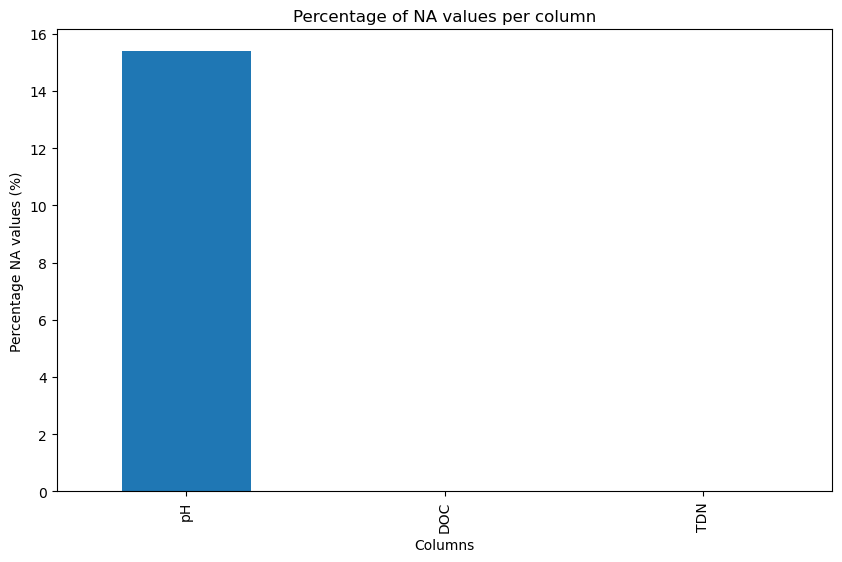

In [30]:
# Count the number of NA values for each column
na_counts = inlet_biochem.isna().sum()

# Calculate the percentage of NA values for each column
total_rows = len(inlet_biochem)
na_percentage = (na_counts / total_rows) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = na_percentage.plot(kind='bar')
plt.title('Percentage of NA values per column')
plt.xlabel('Columns')
plt.ylabel('Percentage NA values (%)')

# Rename x-axis labels
new_labels = ['pH', "DOC", "TDN"]
ax.set_xticklabels(new_labels)

plt.show()

### Save, stage, commit, pull, push!

## END activities